In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

% matplotlib inline

sns.set()


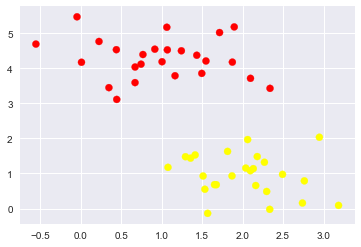

In [6]:
# 随机生成数据
from sklearn.datasets.samples_generator import make_blobs

x, y = make_blobs(
    n_samples=50, centers=2, random_state=0, cluster_std=0.60
)
# 散点图
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap="autumn")


(-1, 3.5)

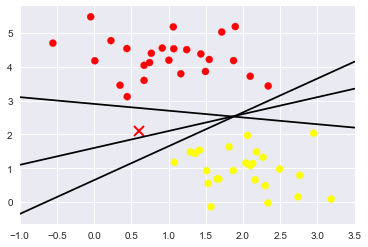

In [8]:
# 试着分类
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap="autumn")
plt.plot([0.6], [2.1], "x", color="red", markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, "-k")

plt.xlim(-1, 3.5)


(-1, 3.5)

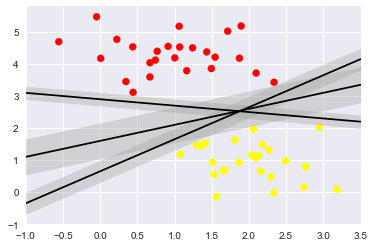

In [10]:
# 画出雷区
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)


In [11]:
# SVC
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(x, y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
# 绘图函数
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], ylim[1], 30)
    y = np.linspace(xlim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors="k",
               levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

    if plot_support:
        # 画出支持向量
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidths=1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


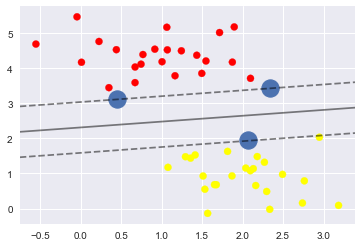

In [32]:
# 调用绘图函数
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(model)
print(model.support_vectors_)


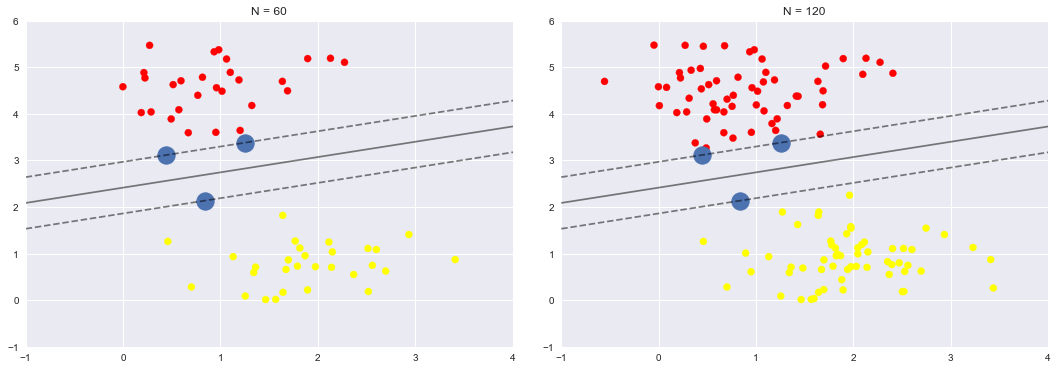

In [33]:
# 只要有相同的支持向量，那么结果也会是一样的
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# 60个点和120个点的情况
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


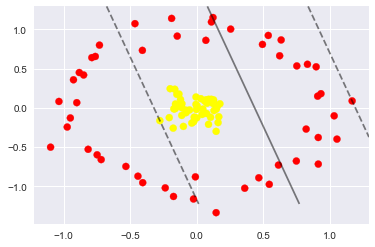

In [36]:
# 像图中这样的情况，分类的结果就不是很好了，根本就分不开
# 那么要引入核函数，来解决这个问题
from sklearn.datasets.samples_generator import make_circles

x, y = make_circles(100, factor=.1, noise=.1, random_state=0)

# SVM 线性
clf = SVC(kernel="linear").fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf, plot_support=False)


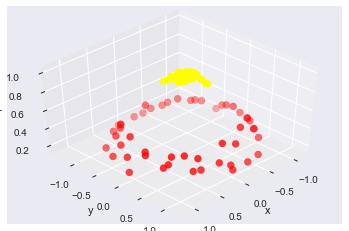

In [37]:
from mpl_toolkits import mplot3d

# 把数据引入到高维
r = np.exp(-(x ** 2).sum(1))
def plot_3D(elev=30, azim=30, x=x, y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(x[:, 0], x[:, 1], r, c=y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")

plot_3D(elev=45, azim=45, x=x, y=y)


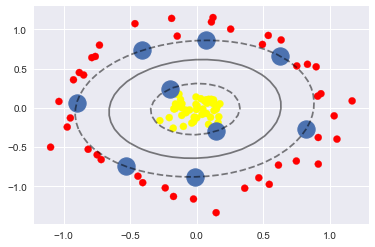

In [41]:
# 加入核函数（径向基函数）
clf = SVC(kernel="rbf", C=1E6)
clf.fit(x, y)

# 绘图
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# 加入了核函数以后就可以很好的分类的


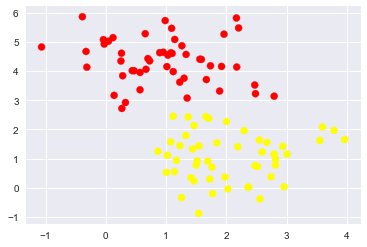

In [44]:
# 软间隔问题
# 可能有离群点，或者其他的情况，导致分类的结果不好。这时候加入参数C解决
x, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')


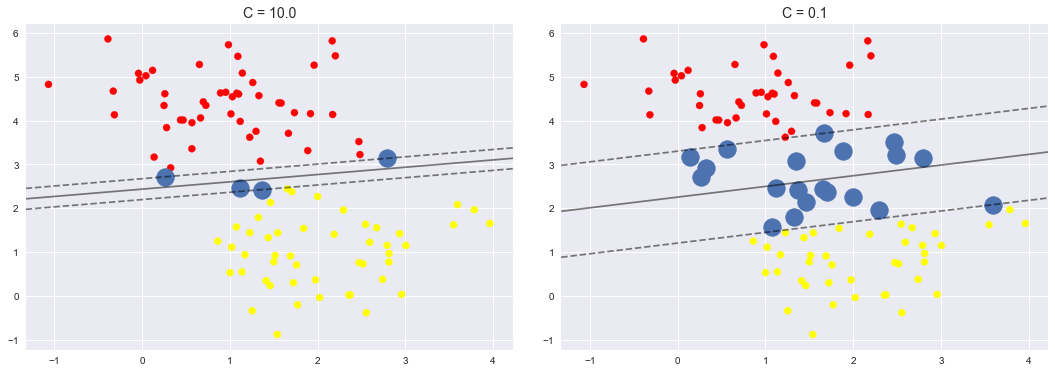

In [46]:
x, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(x, y)

    axi.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap="autumn")
    plot_svc_decision_function(model, axi)
    axi.set_title("C = {0:.1f}".format(C), size=14)

# C大的时候，意味着分类严格不能有错误
# C越小，越可以容忍错误


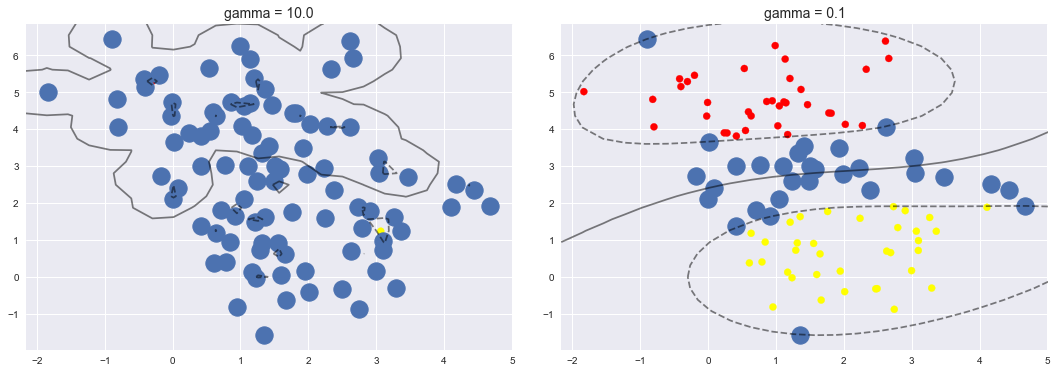

In [49]:
# gamma参数
x, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, gamma in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="rbf", gamma=gamma)
    model.fit(x, y)

    axi.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap="autumn")
    plot_svc_decision_function(model, axi)
    axi.set_title("gamma = {0:.1f}".format(gamma), size=14)

# gamma，越大，模型会越复杂，也就说更多维
# gamma越小，纬度会越低，模型也越简单


In [52]:
# 人脸分类任务
from sklearn.datasets import fetch_lfw_people

# min_faces_per_person参数表示，要选择出一个人的照片有60张以上的数据
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


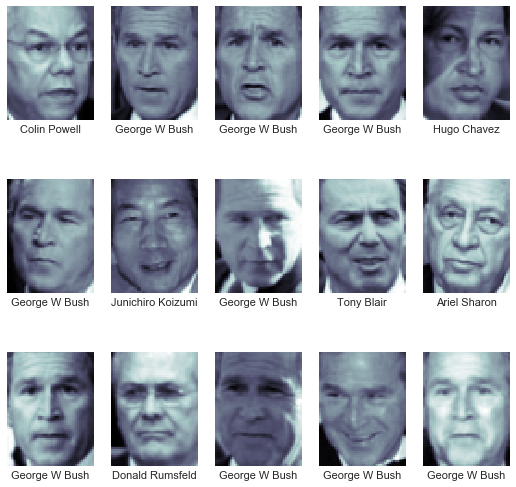

In [57]:
# 展示数据
fig, ax = plt.subplots(3, 5, figsize=(9, 9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

# 每张图片是[62*27]像素
# 把每个像素点当成一个特征，但是特征就太多了，要用PCA降维


In [61]:
# 使用PCA降维
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# n_components表示降维到150
pca = PCA(n_components=150, whiten=True, random_state=0)
svc = SVC(kernel="rbf", class_weight="balanced")
# 使用pca和svc
model = make_pipeline(pca, svc)

# 区分训练集和测试集
xtrain, xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=0)


In [62]:
# 使用GridSearchCV选出较好的参数
from sklearn.model_selection import GridSearchCV

param_grid = {"svc__C": [1, 5, 10],
              "svc__gamma": [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid)

# grid.fit，并且打印运行时间
% time grid.fit(xtrain, ytrain)
print(grid.best_params_)


Wall time: 19.2 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [64]:
# 使用最优参数求解
model = grid.best_estimator_
yfit = model.predict(xtest)
yfit.shape


(337,)

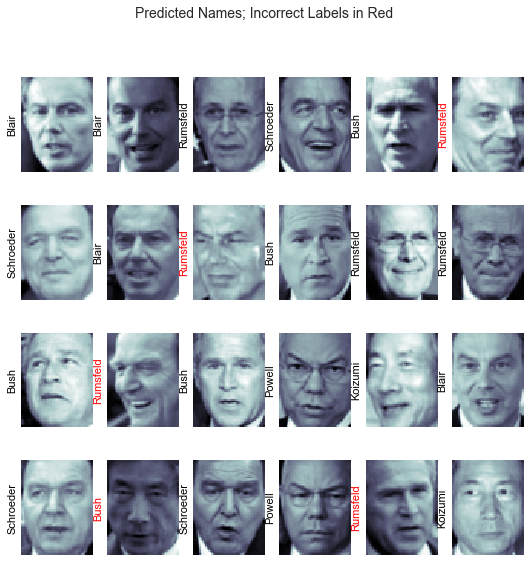

In [66]:
fig, ax = plt.subplots(4, 6, figsize=(9, 9))
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


In [67]:
# 查看结果数据
from sklearn.metrics import classification_report

print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

#精度(precision) = 正确预测的个数(TP)/被预测正确的个数(TP+FP)
#召回率(recall)=正确预测的个数(TP)/预测个数(TP+FN)
#F1 = 2*精度*召回率/(精度+召回率)


                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.75      0.77        16
     Colin Powell       0.84      0.85      0.85        61
  Donald Rumsfeld       0.67      0.86      0.75        35
    George W Bush       0.90      0.89      0.89       125
Gerhard Schroeder       0.75      0.72      0.74        29
      Hugo Chavez       0.88      0.74      0.80        19
Junichiro Koizumi       0.88      0.88      0.88        17
       Tony Blair       0.90      0.77      0.83        35

      avg / total       0.84      0.84      0.84       337



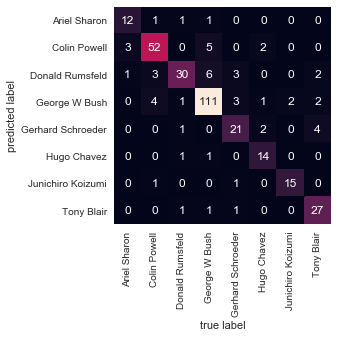

In [68]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
